In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("customer_churn_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print("shape of the original data", data.shape)
data.head()

shape of the original data (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [5]:
""" #profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="FLO Profiling Report")
profile.to_file("Churn_Data_Profiling.html") """

' #profiling\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(data, title="FLO Profiling Report")\nprofile.to_file("Churn_Data_Profiling.html") '

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# get categorical and numerical columns as a list
numerical_features = list(data.select_dtypes(include=['number']).columns)
categorical_features = list(data.select_dtypes(exclude=['number']).columns)

In [8]:
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [10]:
# drop "Churn" and "customerID" columns to visualize easily
categorical_features.remove("customerID")
categorical_features.remove("Churn")

In [11]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [12]:
data.loc[data.Churn=='No','Churn'] = 0 
data.loc[data.Churn=='Yes','Churn'] = 1

In [13]:
def plot_categorical_to_target(df, categorical_values, target):
    number_of_columns = 2
    number_of_rows = (len(categorical_values) + number_of_columns - 1) // number_of_columns
    
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(12, 5 * number_of_rows))
    axes = axes.flatten()
    
    for column, ax in zip(categorical_values, axes):
        sns.countplot(x=column, data=df, hue=target, palette="Blues", ax=ax)
        ax.set_title(column)
    
    plt.tight_layout()
    plt.show()

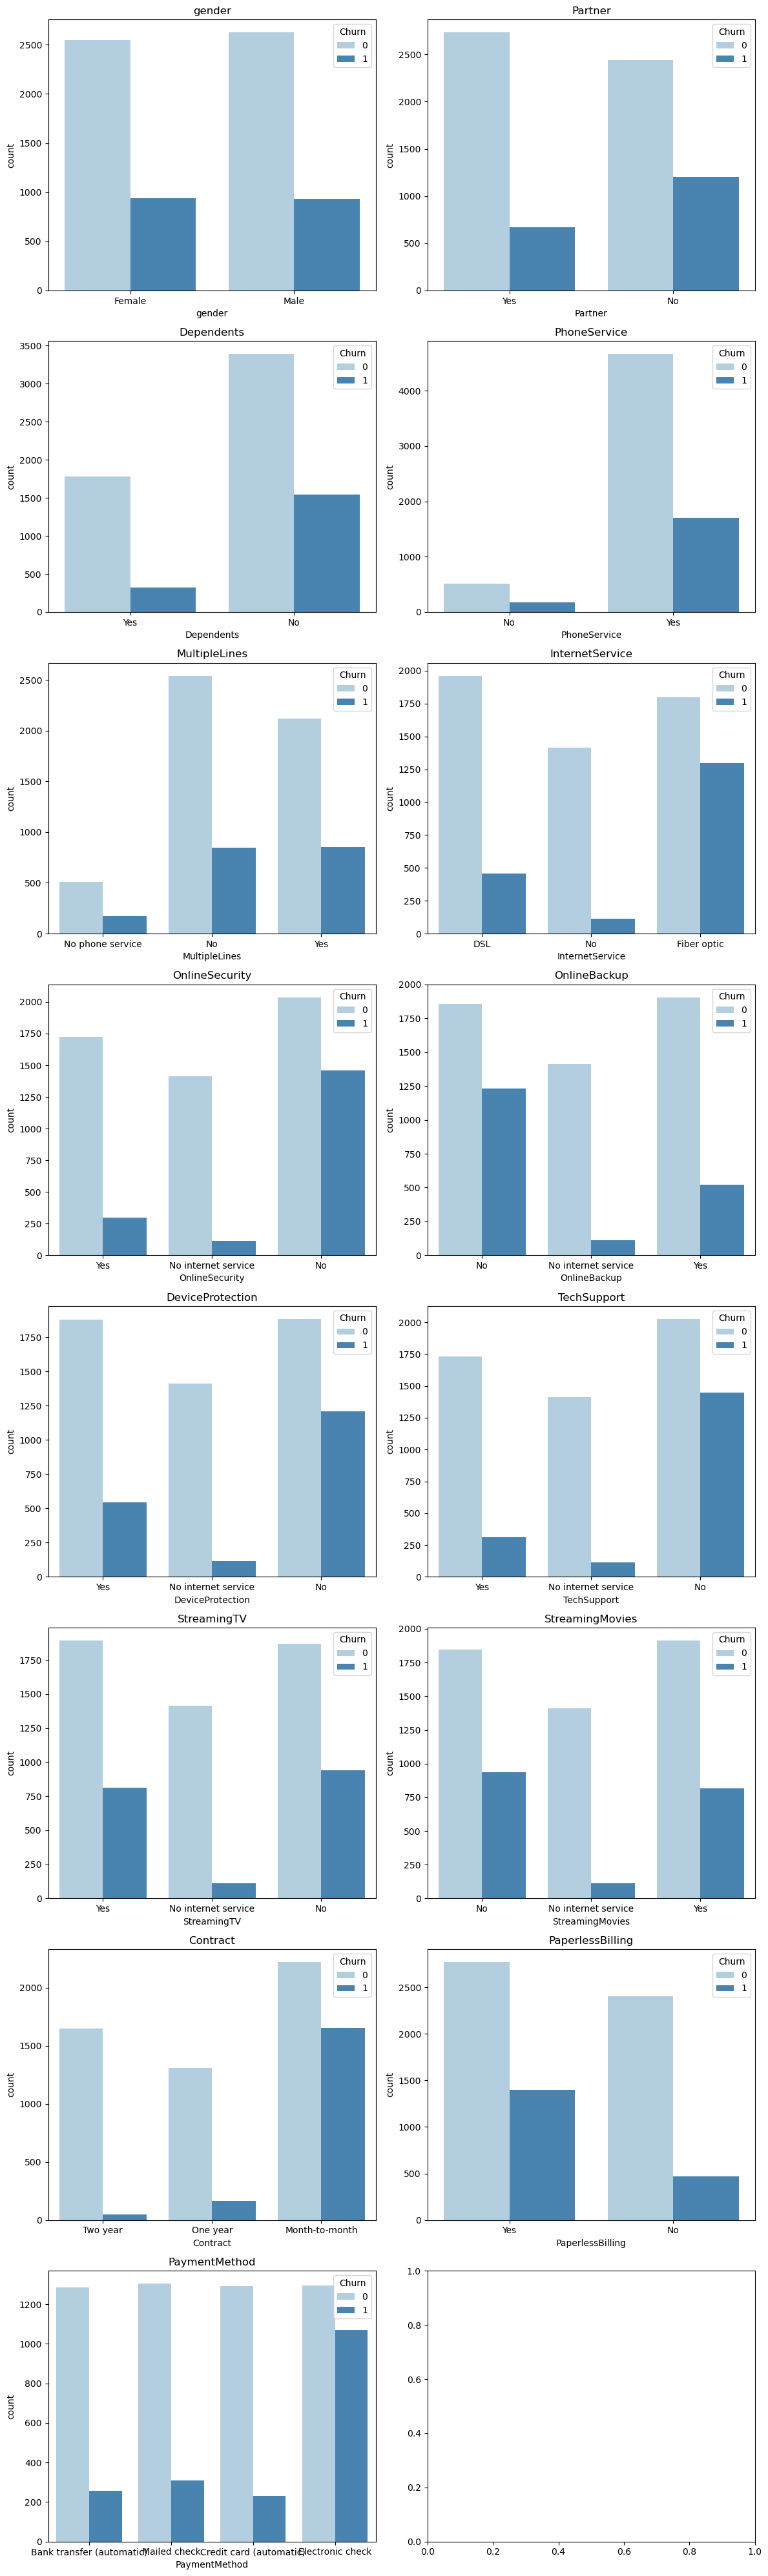

In [14]:
plot_categorical_to_target(data,categorical_features, "Churn")

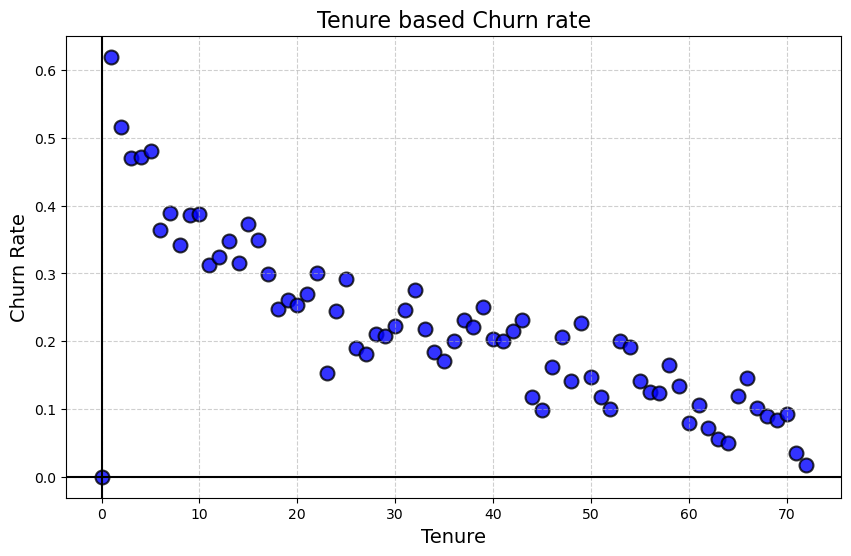

In [15]:
df_plot = data.groupby('tenure')['Churn'].mean().reset_index()

# Scatter plot çizelim
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['tenure'], df_plot['Churn'], color='blue', s=100, alpha=0.8, edgecolors='black', linewidth=1.5)

# Grafik düzenlemeleri
plt.title('Tenure based Churn rate', fontsize=16)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)

# İlgili çizgi ve arkaplan rengi
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

# Grafiği gösterme
plt.show()

In [16]:
# let's write a simple function to see the missing values, this function will return the number of missing values and percentage of missing values.
def missing_data_report(data):
    # calculate the number of missing values
    missing_values = data.isnull().sum()

    # calculate the percentage of the missing values
    percent_missing = (missing_values / data.shape[0]) * 100

    # merge the results into a DataFrame.
    result = pd.DataFrame({
        "number of missing values": missing_values,
        "percentage of missing values": percent_missing
    })

    # sort the results by number of missing values
    result = result.sort_values(by="number of missing values", ascending=False)

    return result

missing_data_report(data)

,number of missing values,percentage of missing values
TotalCharges,11,0.156183
customerID,0,0.000000
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


In [17]:
# init setup
from pycaret.classification import *
s = setup(data, target = "Churn", fix_imbalance = True, ignore_features = ['customerID'])

,Description,Value
0,Session id,3951
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 21)"
4,Transformed data shape,"(9357, 41)"
5,Transformed train set shape,"(7244, 41)"
6,Transformed test set shape,"(2113, 41)"
7,Ignore features,1
8,Ordinal features,5
9,Numeric features,4


In [18]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7961,0.8458,0.5818,0.6263,0.6023,0.4657,0.4668,3.1680
lr,Logistic Regression,0.7509,0.8431,0.7905,0.5207,0.6274,0.4521,0.4749,2.3000
ada,Ada Boost Classifier,0.7870,0.8421,0.6322,0.5932,0.6116,0.4652,0.4660,1.2780
lda,Linear Discriminant Analysis,0.7432,0.8412,0.7928,0.5105,0.6207,0.4401,0.4650,1.2590
lightgbm,Light Gradient Boosting Machine,0.7878,0.8329,0.5320,0.6182,0.5708,0.4311,0.4339,1.3640
qda,Quadratic Discriminant Analysis,0.6473,0.8287,0.9182,0.4244,0.5802,0.3411,0.4182,0.8420
nb,Naive Bayes,0.6943,0.8190,0.8402,0.4589,0.5934,0.3809,0.4259,1.2600
rf,Random Forest Classifier,0.7753,0.8153,0.4916,0.5937,0.5371,0.3906,0.3940,1.6500
et,Extra Trees Classifier,0.7623,0.7882,0.4663,0.5653,0.5099,0.3551,0.3586,1.6250
knn,K Neighbors Classifier,0.6947,0.7438,0.6536,0.4488,0.5317,0.3169,0.3296,1.2640


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [19]:
# print best_model parameters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3951, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [20]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8093,0.8464,0.5769,0.6579,0.6148,0.4888,0.4907
1,0.7911,0.8382,0.5538,0.6154,0.5830,0.4441,0.4452
2,0.7728,0.8255,0.5191,0.5812,0.5484,0.3973,0.3984
3,0.8438,0.8560,0.6489,0.7328,0.6883,0.5846,0.5865
4,0.7769,0.8166,0.5344,0.5882,0.5600,0.4110,0.4119
5,0.7931,0.8335,0.5573,0.6239,0.5887,0.4511,0.4524
6,0.8154,0.8665,0.6183,0.6639,0.6403,0.5164,0.5170
7,0.7890,0.8350,0.5878,0.6063,0.5969,0.4541,0.4542
8,0.7890,0.8343,0.5878,0.6063,0.5969,0.4541,0.4542


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


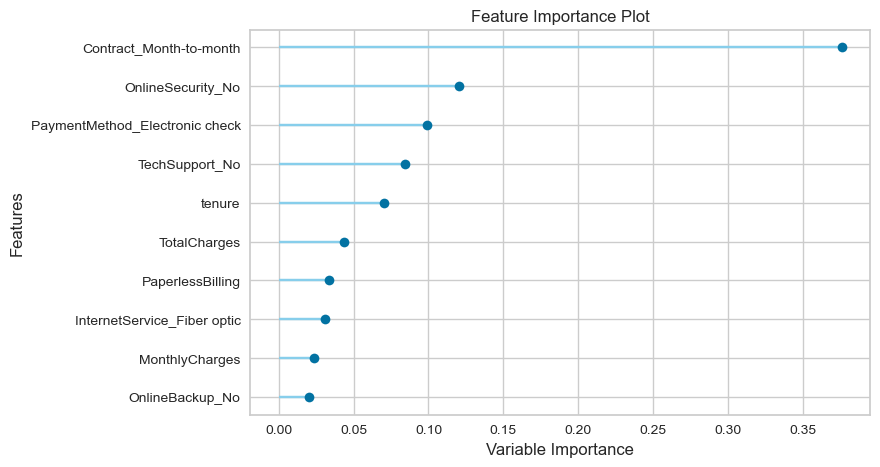

In [21]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

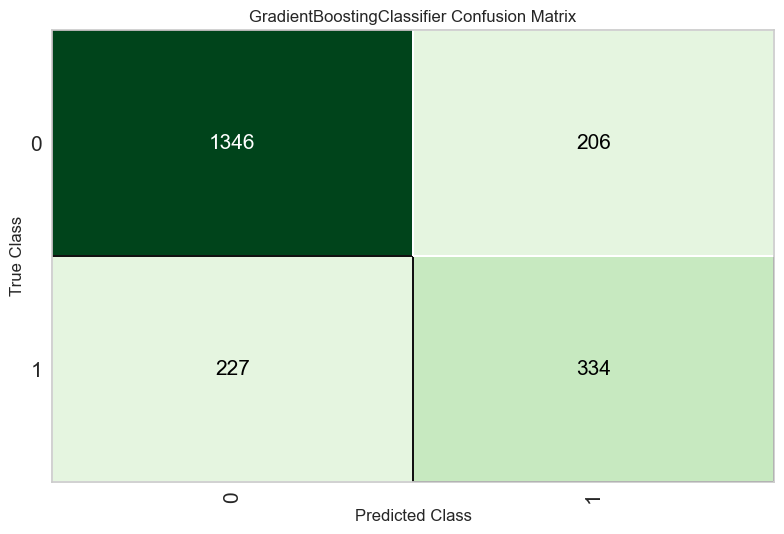

In [22]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [23]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])
# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <function calculate_profit at 0x00000207C751FE20>
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [24]:
# compare all models
best_model_for_profit = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lr,Logistic Regression,0.7509,0.8431,0.7905,0.5207,0.6274,0.4521,0.4749,318200.0000,1.0220
qda,Quadratic Discriminant Analysis,0.6473,0.8287,0.9182,0.4244,0.5802,0.3411,0.4182,317200.0000,0.8350
ridge,Ridge Classifier,0.7438,0.0000,0.7935,0.5112,0.6215,0.4413,0.4662,315900.0000,0.8920
lda,Linear Discriminant Analysis,0.7432,0.8412,0.7928,0.5105,0.6207,0.4401,0.4650,315300.0000,0.8680
nb,Naive Bayes,0.6943,0.8190,0.8402,0.4589,0.5934,0.3809,0.4259,309800.0000,0.8720
ada,Ada Boost Classifier,0.7870,0.8421,0.6322,0.5932,0.6116,0.4652,0.4660,273900.0000,0.9480
gbc,Gradient Boosting Classifier,0.7961,0.8458,0.5818,0.6263,0.6023,0.4657,0.4668,258600.0000,0.9140
knn,K Neighbors Classifier,0.6947,0.7439,0.6536,0.4488,0.5317,0.3169,0.3296,236800.0000,0.9390
lightgbm,Light Gradient Boosting Machine,0.7878,0.8329,0.5320,0.6182,0.5708,0.4311,0.4339,235000.0000,0.8210
svm,SVM - Linear Kernel,0.6260,0.0000,0.7109,0.4696,0.5112,0.2756,0.3261,225400.0000,0.8130


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

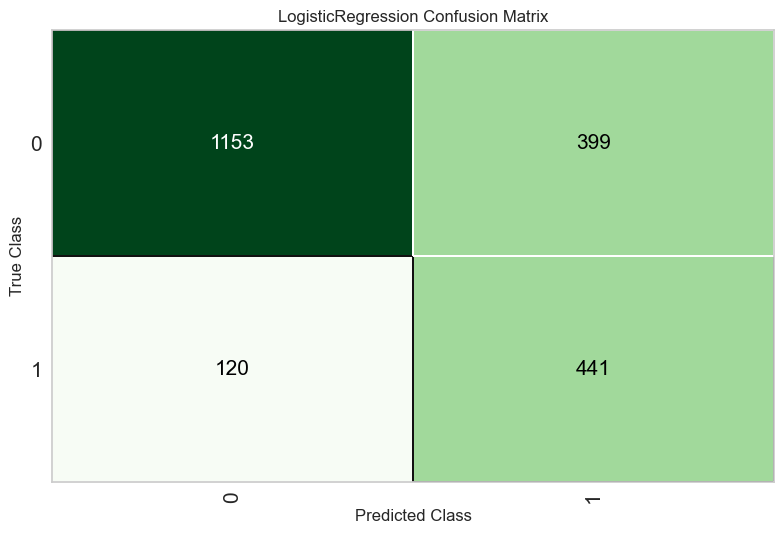

In [25]:
plot_model(best_model_for_profit, plot = 'confusion_matrix')